In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict 
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
#Dictionary for genres label encoding:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [37]:
#cargo csvs:
data=pd.read_csv("./Features/features3.csv")#training data
t1data=pd.read_csv("./Features/features_test_1.csv")#test songs 1 row
t2data=pd.read_csv("./Features/features_test_2.csv")#test songs 2 rows


In [38]:
X=data.drop('genre',axis=1)
Xt1=t1data.drop('genre',axis=1)
Xt2=t2data.drop('genre',axis=1)

In [39]:
y=data.genre
yt1=t1data.genre
yt2=t2data.genre


In [40]:
scaled_features = StandardScaler().fit_transform(X.values)
sc1=StandardScaler().fit_transform(Xt1.values)
sc2=StandardScaler().fit_transform(Xt2.values)

X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
Xt1=pd.DataFrame(sc1, index=Xt1.index, columns=Xt1.columns)
Xt2=pd.DataFrame(sc2, index=Xt2.index, columns=Xt2.columns)


In [58]:
yt1.shape

(10,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from keras import models
from keras import layers

model1 = models.Sequential()

model1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(10, activation='softmax'))

In [63]:
#Try with 'rmsprop' optimizer
model1.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
history = model1.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=128,validation_split=0.1)

Train on 2138 samples, validate on 238 samples
Epoch 1/50
2138/2138 [==============================] - 1s 630us/step - loss: 1.8514 - acc: 0.3382 - val_loss: 1.4805 - val_acc: 0.4874
Epoch 2/50
2138/2138 [==============================] - 0s 78us/step - loss: 1.4594 - acc: 0.4813 - val_loss: 1.2366 - val_acc: 0.5504
Epoch 3/50
2138/2138 [==============================] - 0s 78us/step - loss: 1.2851 - acc: 0.5365 - val_loss: 1.0913 - val_acc: 0.6471
Epoch 4/50
2138/2138 [==============================] - 0s 79us/step - loss: 1.1676 - acc: 0.5814 - val_loss: 0.9966 - val_acc: 0.6681
Epoch 5/50
2138/2138 [==============================] - 0s 75us/step - loss: 1.0699 - acc: 0.6174 - val_loss: 0.9369 - val_acc: 0.6639
Epoch 6/50
2138/2138 [==============================] - 0s 79us/step - loss: 1.0045 - acc: 0.6450 - val_loss: 0.8425 - val_acc: 0.7185
Epoch 7/50
2138/2138 [==============================] - 0s 80us/step - loss: 0.9648 - acc: 0.6642 - val_loss: 0.8014 - val_acc: 0.7185
Epoch 8

In [68]:
test_loss, test_acc = model1.evaluate(X_test,y_test)

594/594 [==============================] - 0s 99us/step


In [69]:
print(test_loss, test_acc)

0.5607331588814154 0.8333333335340224


In [70]:
test_loss, test_acc = model1.evaluate(X_test[:10],y_test[:10])
print(test_loss, test_acc)

10/10 [==============================] - 0s 614us/step
0.2259548157453537 0.8999999761581421


In [71]:
y_pred=model1.predict(X_test)

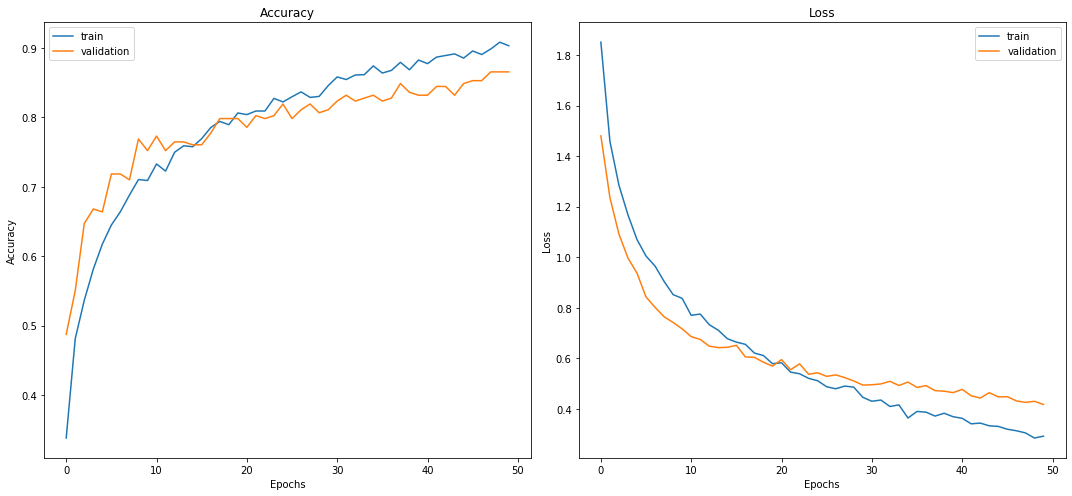

In [72]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


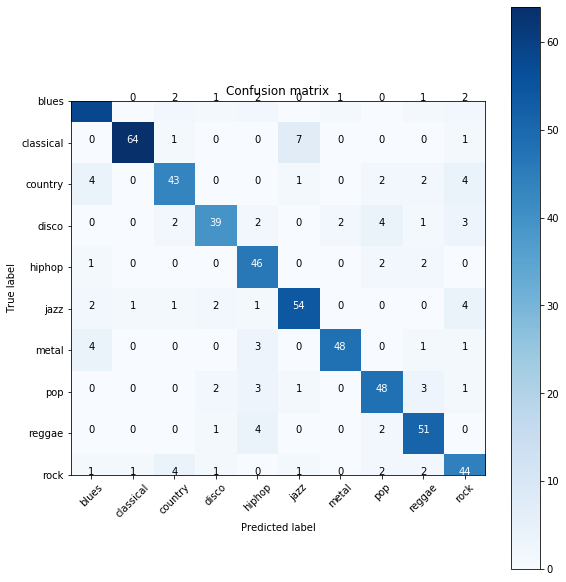

In [74]:
from sklearn.metrics import confusion_matrix
preds = np.argmax(model1.predict(X_test), axis = 1)
cm = confusion_matrix(preds,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=False)

In [75]:
#
test_loss, test_acc = model1.evaluate(Xt1,yt1)
print(test_loss, test_acc)

10/10 [==============================] - 0s 986us/step
1.1628713607788086 0.6000000238418579


In [76]:
test_loss, test_acc = model1.evaluate(Xt2,yt2)
print(test_loss, test_acc)

20/20 [==============================] - 0s 275us/step
1.225267767906189 0.6000000238418579


In [77]:
test_loss, test_acc = model1.evaluate(X_test,y_test)
print(test_loss, test_acc)

594/594 [==============================] - 0s 81us/step
0.5607331588814154 0.8333333335340224


In [79]:
y_pred=model1.predict_classes(Xt1)

In [80]:
y_pred


array([5, 1, 3, 3, 4, 5, 6, 7, 9, 2])

In [81]:
yt1

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: genre, dtype: int64

In [179]:
import seaborn as sns

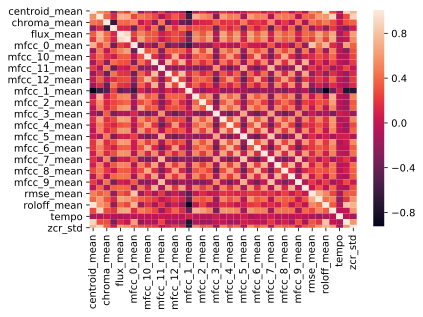

In [184]:
sns.heatmap(X.corr())